# Nonparametric regression

Given $(X_1, Y_1), \cdots, (X_n, Y_n)$. Predict $Y$ from $X$. Assume $Y(i)=m(X_i)+\epsilon_i$, where $m(X)$ is a smooth function of $X$. The most popular methods are **kernel methods**. There are two types of kernels:
    1. Smoothing kernels: local averaging
    2. Mercer kernels: regularization

## Smoothing kernels

1. Smoothing kernel estimator 
\begin{equation}
\hat{m}_h(x) = \frac{\sum_{i=1}^n Y_i K_h(X_i, x)}{\sum_{i=1}^n K_h(X_i, x)}
\end{equation}

where $K_h(x, z)$ is a kernel such as 
\begin{equation}
K_h(x,z) = \exp\left( -\frac{\|x-z\|^2}{2h^2} \right)
\end{equation}

and $h>0$ is called the bandwidth.

2. $\hat{m}_h(x)$ is just a local average of the $Y_i$'s near $x$.

3. The bandwidth $h$ controls the bias-variance trade-off: small $h$ = large variance; large $h$= small variance.

## Mercer kernels

Instead of using local smoothing, we can optimize the fit to the data subject to regularization (penalization). Choose $\hat{m}$ to minimize

where $K_h(x, z)$ is a kernel such as 
\begin{equation}
\sum_i (Y_i-\hat{m}(X_i))^2 + \lambda \text{penalty} (m)
\end{equation}

where $\text{penalty} (m)$ is a roughness penalty. $\lambda$ is a smoothing parameter that controls the amount of smoothing.

Using **Representer Theorem**, let $\hat{m}$ minimize 

\begin{equation}
J = \sum_{i=1}^n (Y_i - m(X_i))^2 + \lambda \|m\|_K^2
\end{equation}

Then, 
\begin{equation}
\hat{m}(x) = \sum_{i=1}^n \alpha_i K(X_i, x)
\end{equation}

for some $\alpha_1, \cdots, \alpha_n$. So, we only need to find the coefficients $\alpha = (\alpha_1, \cdots, \alpha_n)$. Plug above $\hat{m}(x)= \sum_{i=1}^n \alpha_i K(X_i, x)$ into $J$,
\begin{equation}
J = \|Y - K\alpha\|^2 + \lambda \alpha^{\top} K \alpha
\end{equation}

where $K_{jk} = K(X_j, X_k)$. Now we need to find $\alpha$ to minimize $J$. We get $\hat{\alpha}=(K+\lambda I)^{-1}Y$ and $\hat{m}(x) = \sum_{i=1}^n \hat{\alpha_i} K(X_i, x)$


## Example 1-d Nonparametric regression with smoothing kernel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## create target non-linear function
def f(x):
    return np.sin(x/10.0) + (x/50.0)**2

In [3]:
## define input x, ground truth y_true, and observed data
x = np.arange(1,101)
y_true = f(x)
y = y_true + 0.2*np.random.randn(*x.shape)

In [8]:
## define smoothing kernel (Gaussian kernel)
def smooth_ker(xs):
    for i in range(*xs.shape):
        w = np.exp(-((xs[i]-x)**2)/(2*h**2))
        ys[i] = np.dot(w, y)/np.sum(w)
    return ys    

In [9]:
## define the input xs at which to approximate the function
xs = np.arange(1, 100.5, 0.5)
## create an empty vector ys to hold the approximate function values
ys = np.zeros(xs.shape, dtype=np.float64)

In [19]:
def plot_reg_h(h):
    beta = 1/(2*h**2)
    grid = np.r_[0:100:512j]
    plt.figure(figsize=(5,4))
    plt.plot(grid, f(grid), 'k--', label='Ground truth', linewidth=4)
    plt.plot(x, y, 'o', alpha=0.6, label='Observed Data')
    plt.plot(xs, smooth_ker(xs), 'r--', label='Regression', linewidth=4)
    plt.legend(loc='best')
    plt.title('Smoothing kernel regression with bandwidth h=%i' %h,  fontsize=20, fontweight='bold')

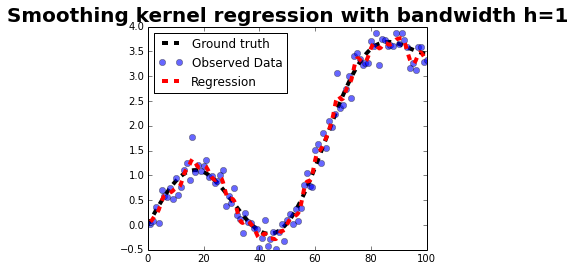

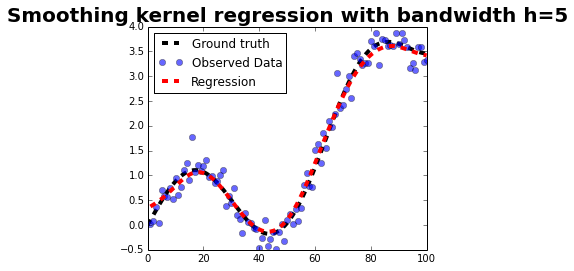

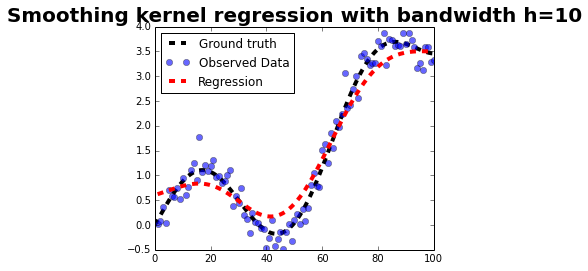

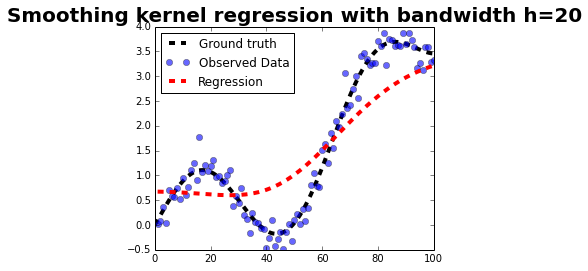

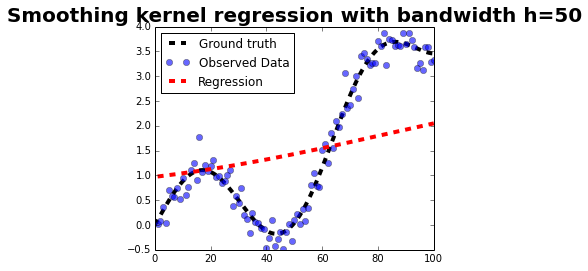

In [20]:
## define bandwidth
for h in np.array([1, 5, 10, 20, 50]):
    plot_reg_h(h)
